In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
taxi = pd.read_parquet("Datasets_viajes/yellow_tripdata_2023-01.parquet")

In [4]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

Vistazo general al dataset, podemos ver presencia de nulos y que consiste en los viajes realizados por los taxis, dandonos informacion de hora de recogida del cliente junto con la hora de llegada al destino, a si mismo nos da informacion de la tarifa, cantidad de pasajeros, distancia, entre otra informacion.

In [5]:
taxi

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


Visualizamos outliers en la tarifa de viaje

In [6]:
taxi["fare_amount"].describe()

count    3.066766e+06
mean     1.836707e+01
std      1.780782e+01
min     -9.000000e+02
25%      8.600000e+00
50%      1.280000e+01
75%      2.050000e+01
max      1.160100e+03
Name: fare_amount, dtype: float64

Visualizamos outliers en las distancias de viajes

In [26]:
taxi["trip_distance"].describe()

count    3.066766e+06
mean     3.847342e+00
std      2.495838e+02
min      0.000000e+00
25%      1.060000e+00
50%      1.800000e+00
75%      3.330000e+00
max      2.589281e+05
Name: trip_distance, dtype: float64

Visualizamos nulos en el dataframe

In [7]:
taxi.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64

Controlamos los nulos rellenando con 0 o N en el caso de "store_and_fwd_flag" y eliminamos la columna RateCodeID ya que no nos sera de utilidad para graficar la informacion y sacar algunas conclusiones

In [8]:
taxi["airport_fee"] = taxi["airport_fee"].fillna(0)
taxi["congestion_surcharge"] = taxi["congestion_surcharge"].fillna(0)
taxi["store_and_fwd_flag"] = taxi["store_and_fwd_flag"].fillna("N")
taxi = taxi.drop(columns="RatecodeID")
taxi["passenger_count"] = taxi["passenger_count"].fillna(0)

Aqui podemos ver que no tenemos duplicados en el dataframe

In [9]:
taxi.duplicated().sum()

0

Acortamos el dataframe en cuanto a la informacion de distancia de los viajes para eliminar outliers debido a que encontramos viajes de 120000 millas lo cual no tiene sentido, a si mismo encontramos viajes de mas de mil dolares lo que tampoco cuadra con el hecho de que las distancias mas comunes son menores a 7 millas

In [10]:
Q1 = taxi['trip_distance'].quantile(0.25)
Q3 = taxi['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

umbral_superior = Q3 + 1.5 * IQR
df_filtrado = taxi[taxi['trip_distance'] <= umbral_superior]

umbral_superior_tarifa = 250
umbral_inferior_tarifa = 0

df_filtrado_tarifas = df_filtrado[(df_filtrado['fare_amount'] <= umbral_superior_tarifa) & (df_filtrado['fare_amount'] >= umbral_inferior_tarifa)]

visualizamos el dataframe filtrado y tratado

In [11]:
df_filtrado_tarifas

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,0.0,3.05,N,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,0.0,0.00
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,0.0,5.80,N,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,0.0,0.00
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,0.0,4.67,N,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,0.0,0.00
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,0.0,3.15,N,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,0.0,0.00


En este grafico podemos visualizar que tanta frecuencia tienen los viajes de X distancia y podemos ver que los que sos aproximadamente de una milla son los mas comunes con aproximadamente 400000 viajes de estas caracteristicas

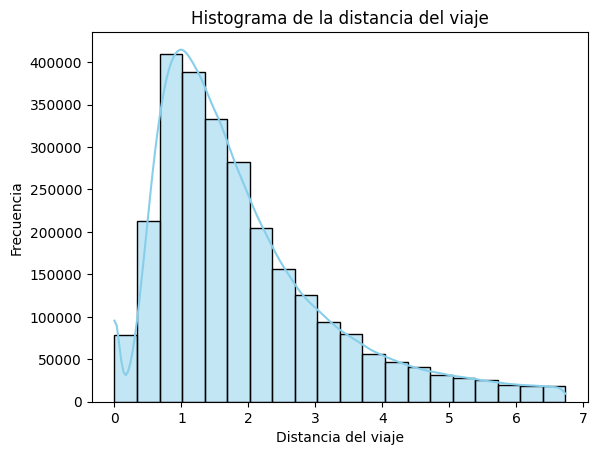

In [19]:
sns.histplot(df_filtrado_tarifas['trip_distance'], bins=20, kde=True, color='skyblue')
plt.xlabel('Distancia del viaje')
plt.ylabel('Frecuencia')
plt.title('Histograma de la distancia del viaje')
plt.show()

En este grafico podemos ver la cantidad de pasajeros mas comun por viaje, y claramente podemos ver que lo normal es un solo pasajero por viaje siendo casi 2 millones de veces que ha viajado un solo pasajero dentro del taxi, por tanto se podria plantear el hecho de cambiar la tarifa de acuerdo a la cantidad de pasajeros pero tambien es importante tener en cuenta que esto puede alejar clientes

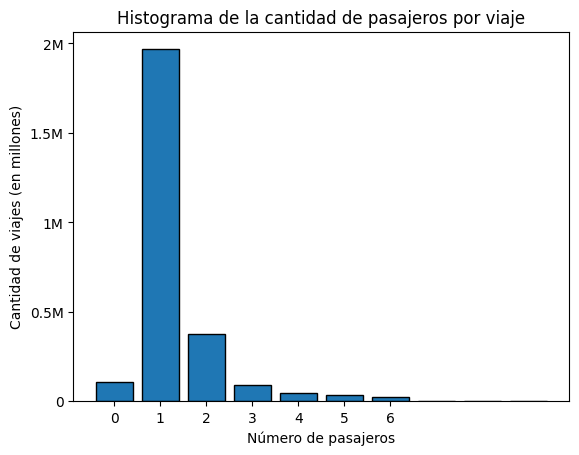

In [25]:
conteo_pasajeros = df_filtrado_tarifas['passenger_count'].value_counts()
ax = plt.bar(conteo_pasajeros.index, conteo_pasajeros, edgecolor='black')
plt.xlabel('Número de pasajeros')
plt.ylabel('Cantidad de viajes (en millones)')
plt.title('Histograma de la cantidad de pasajeros por viaje')
ax = plt.gca()
ax.set_yticks([0, 5e5, 1e6, 1.5e6, 2e6])
ax.set_yticklabels(['0', '0.5M', '1M', '1.5M', '2M'])
plt.xticks(range(7), range(7))
plt.show()

En este grafico podemos visualizar como va cambiando la tarifa de viaje de acuerdo a la distancia del viaje, debido a la gran cantidad de datos se toma una muestra y a partir de ahi se grafica, podemos ver una pequeña tendencia a aumentar el coste del viaje con la distancia lo cual tiene sentido, pero tambien nos vemos en la situacion en que viajes de gran distancia valen lo mismo o menos que viajes de menor distancia

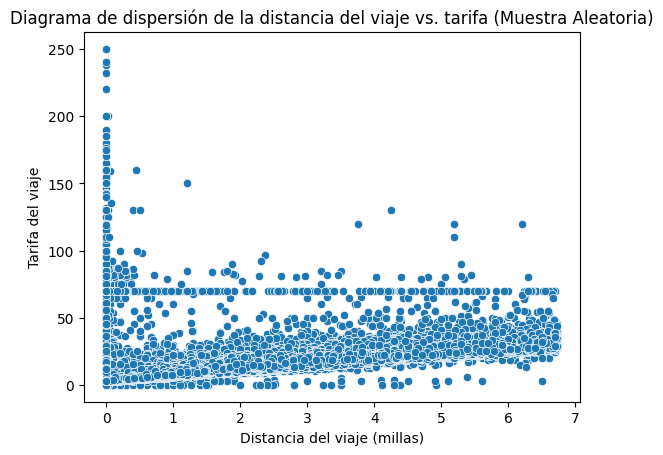

In [16]:
df_muestra_aleatoria = df_filtrado_tarifas.sample(frac=0.1)

sns.scatterplot(x='trip_distance', y='fare_amount', data=df_muestra_aleatoria)
plt.xlabel('Distancia del viaje (millas)')
plt.ylabel('Tarifa del viaje')
plt.title('Diagrama de dispersión de la distancia del viaje vs. tarifa (Muestra Aleatoria)')
plt.show()

Aqui tenemos un grafico simple que busca mostrar que tantos viajes se realizaron a traves de un proovedor y como se ve VeriFone Inc. ha demostrado mayor utilidad a la hora de conseguir clientes ya que tiene un millon mas de viajes realizados gracias a sus servicios

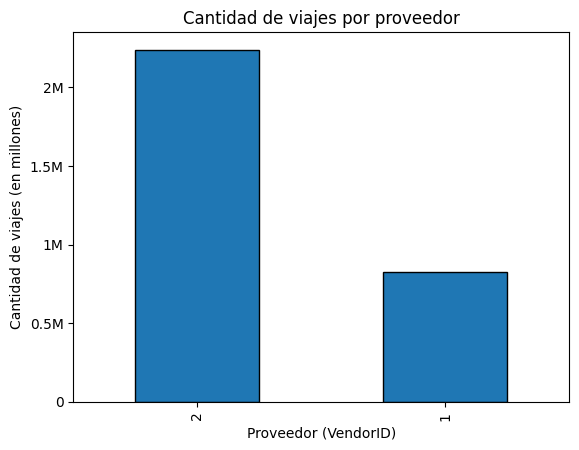

In [18]:
conteo_viajes = taxi['VendorID'].value_counts()
ax = conteo_viajes.plot(kind='bar', edgecolor='black')
ax.set_yticks([0, 5e5, 1e6, 1.5e6, 2e6])
ax.set_yticklabels(['0', '0.5M', '1M', '1.5M', '2M'])
plt.xlabel('Proveedor (VendorID)')
plt.ylabel('Cantidad de viajes (en millones)')
plt.title('Cantidad de viajes por proveedor')
plt.show()